# P1: Convolutions, Fourier Transforms, and Image Pyramids

This is the first programming assignment you will be asked to complete in the course. As we are just starting off, I have tried to keep this assignment to a manageable size (especially since many of us are working remotely and on different schedules). In the future, I will give you assignments that are a bit more open-ended, and encourage you to try different options, discover which are more effective for different tasks, and explain the decisions you have made. Since this is the beginning of the class, this assignment is a bit more formulaic.

You are *required* to LaTeX your solutions to this assignment and use the 10pt, 2-column `ieeeconf` template. You can find the template [on Overleaf](https://www.overleaf.com/latex/templates/preparation-of-papers-for-ieee-sponsored-conferences-and-symposia/zfnqfzzzxghk); Overleaf is an online LaTeX editor with a free tier, so feel free to use that service to compose your writeups. It is perhaps the easiest option, particularly if you are not as familiar with LaTeX. The space limit for this assignment is **4 pages maximum**. While I don't expect this limit will pose a particular challenge for this assignment, in the future I hope that it will encourage you to think more carefully about what results you choose to include and to be more clear and succinct with your writing. You are allowed to work in small groups (2 or 3 students), but your solutions and your writeup should be your own.

With these homework assignments, I expect that your solutions will be written as if they are research papers: though the content is not "new", you should be trying to convince me through your writing that you have implemented and understand the algorithms. You should write in full sentences. When appropriate, comment on when the algorithms succeed or fail and where they are more or less effective; include numbers/metrics (quantitative) in addition to discussion (qualitative) whenever possible. If I ask you to compare two algorithms or approaches, you should be thorough in your comparison, using numbers in addition to qualitative explanations whenever possible. For example, at the end of P1.2.2, I ask you to compare different upsampling algorithms. Your response should include a discussion (in words) about how they are similar and different, but might also include a quantitative comparison: *by how much* do each of the upsampling algorithms differ from the original image? The [L2-norm](https://mathworld.wolfram.com/L2-Norm.html) might be meaningful to include.

Just like in a published paper, you should not include code snippets in your writeup unless it is explicitly asked for or you think it helps you explain your results or answer the question. **I will ask you to submit both the PDF of your writeup *and* a .zip file containing your code (which may be a modified form of this Jupyter notebook) on Blackboard**. Though it would be nice if your code were cleaned up and nicely formatted/commented, we will not likely execute your code unless we are skeptical for academic integrity reasons. We may also use your code to evaluate partial credit on multi-part assignments.

In [1]:
# Starter code (run this first)
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.signal
from PIL import Image

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(np.float)/255)[:, :, :3]

## P1.1 Getting Started With Filtering

In this first assignment, you will be writing functions to generate your own image filters and using them to process images. For this problem, **you are encouraged to use an image of your own choosing** (with a size of roughly 500px along either dimension), but you are also free to use the image I have provided.

**You do not need to implement the convolution yourself.** Your version will be slower than the version built in to `scipy.signal`, which you are welcome to use. I have provided you with some simple code to get you started:

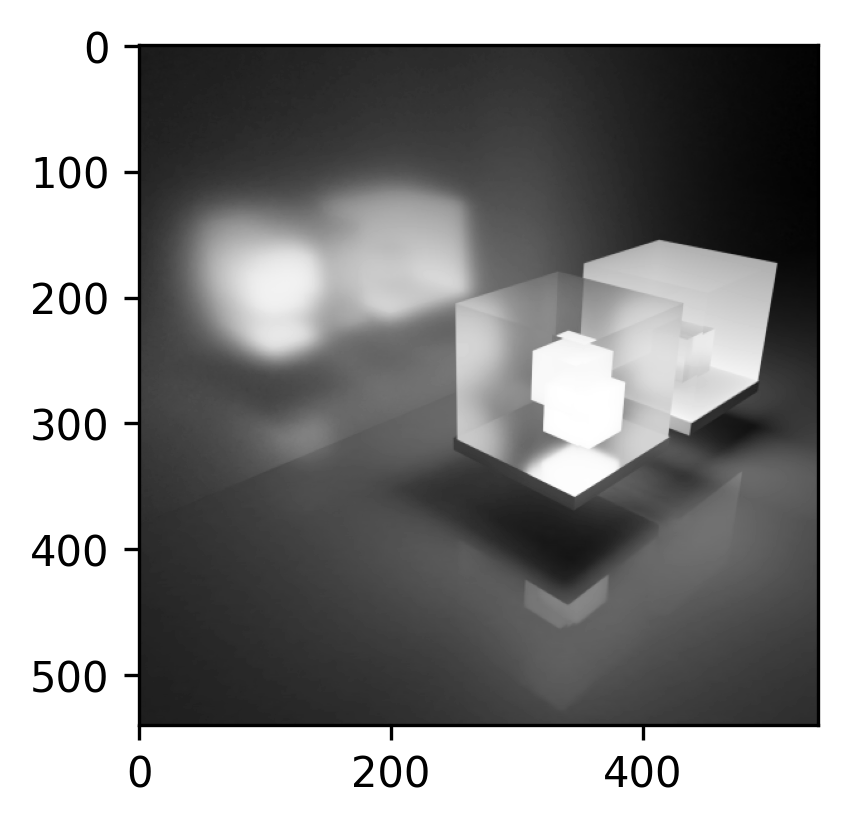

In [2]:
import scipy.signal

image = load_image("light_cubes_sm.png")[:, :, 0]
example_filter = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]
filtered_image = scipy.signal.convolve2d(
    image, example_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(filtered_image, cmap='gray')

None

### P1.1.1 Some Simple Filters

Apply the following filters to your image and plot them. For each, describe the effects the filter has on the image (and name it if you've seen it before). Which filters are *separable*? For the separable filters, write their components parts:

$$f_a = \frac{1}{9}\begin{bmatrix} 
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \end{bmatrix} $$
    
$$f_b = \frac{1}{3}\begin{bmatrix} 
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \end{bmatrix} $$

$$f_c = \frac{1}{6}\begin{bmatrix} 
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 
    \end{bmatrix} $$
    
$$f_d = \frac{1}{3}\begin{bmatrix} 
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 
    \end{bmatrix} $$

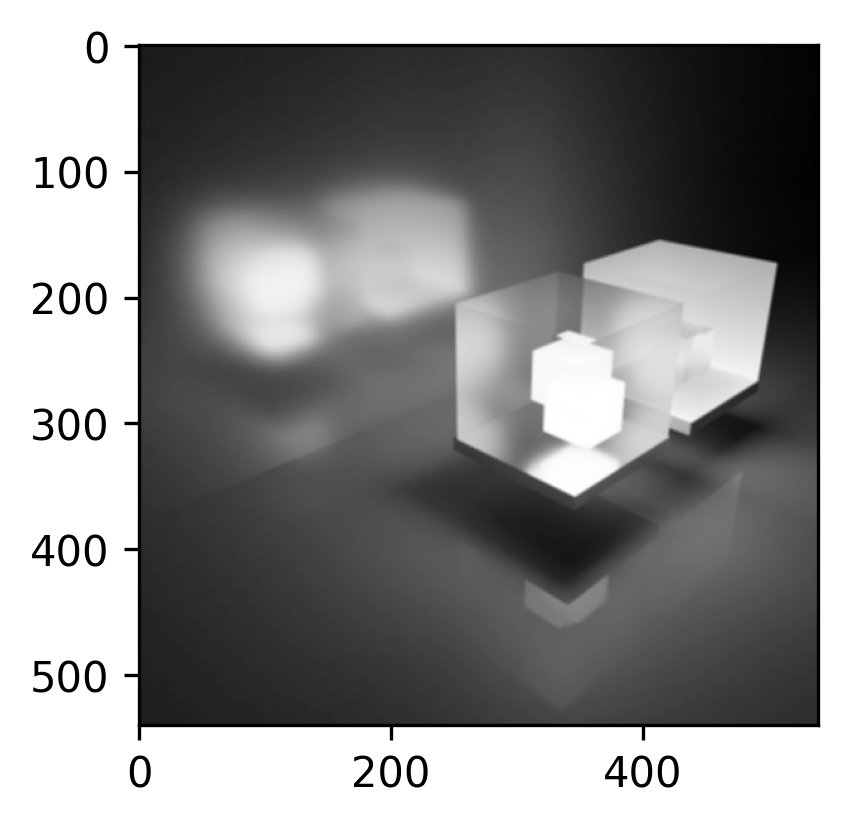

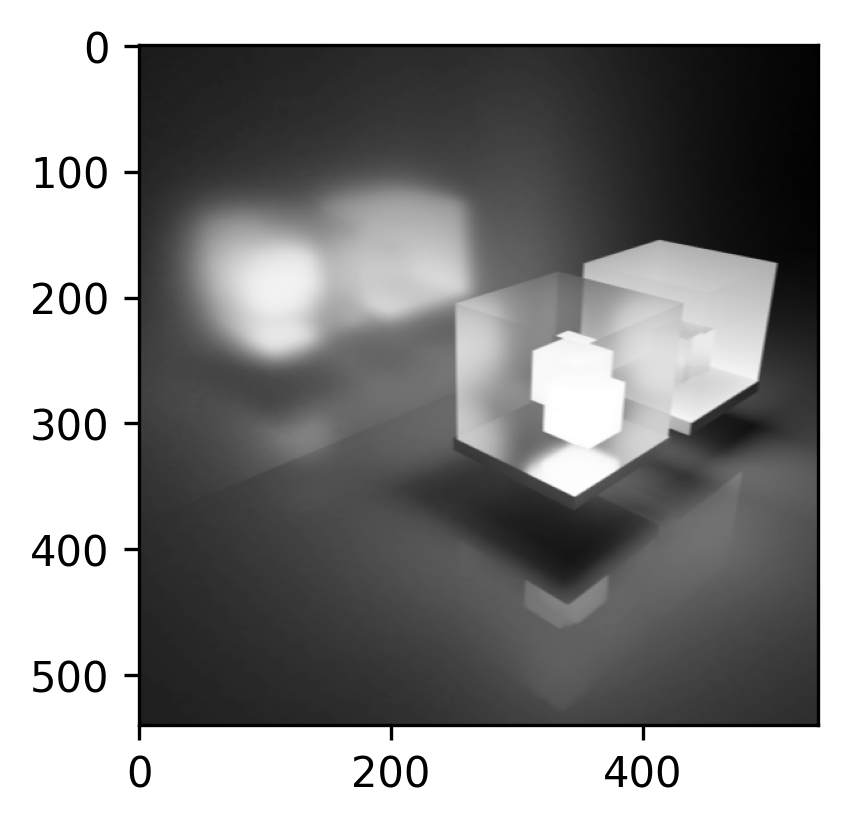

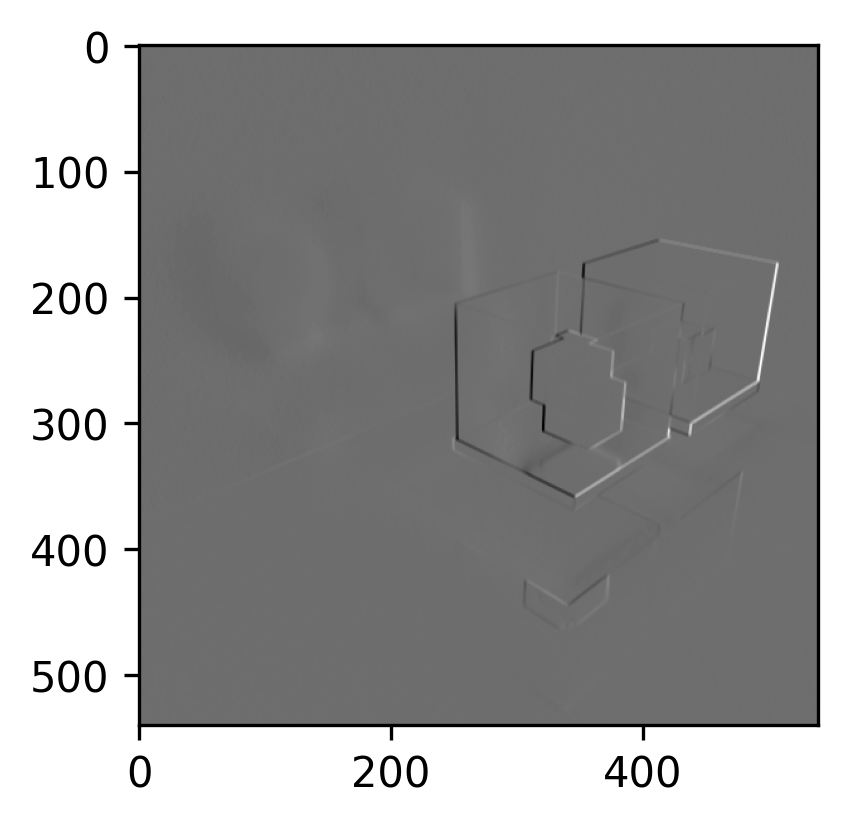

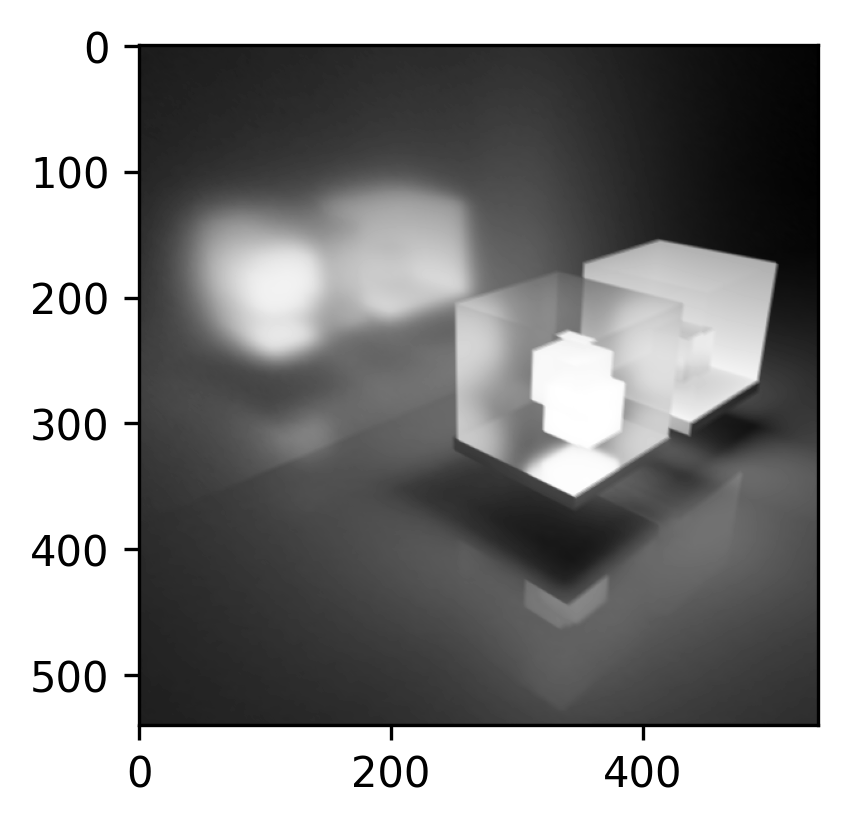

In [17]:
f_a_filter = 1/9 * np.array( [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

f_a_image = scipy.signal.convolve2d(
    image, f_a_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(f_a_image, cmap='gray')
plt.savefig("f_a.eps", format = 'eps')



f_b_filter = 1/3 * np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])

f_b_image = scipy.signal.convolve2d(
    image, f_b_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(f_b_image, cmap='gray')
plt.savefig("f_b.eps", format = 'eps')




f_c_filter = 1/6 * np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

f_c_image = scipy.signal.convolve2d(
    image, f_c_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(f_c_image, cmap='gray')
plt.savefig("f_c.eps", format = 'eps')





f_d_filter = 1/3 * np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

f_d_image = scipy.signal.convolve2d(
    image, f_d_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(f_d_image, cmap='gray')
plt.savefig("f_d.eps", format = 'eps')



### P1.1.2 Image Derivatives

Plot the following for the images you have chosen:
- The image derivatives $I_x$ and $I_y$, computed using the vertical and horizontal Sobel filters.
- Using $I_x$ and $I_y$, compute the image gradient magnitude and angle; include figures of both.
- Using a finite-difference method, derive a filter for the image laplacian: $$\nabla^2 I = \frac{\partial^2 I}{x^2} + \frac{\partial^2 I}{x^2}$$ Compute and plot the laplacian for your image (and include the definition of your Laplacian filter).

Be sure to title your plots so that it is clear which plot is which. 

*Note*: Be attentive with your color schemes for your plots. When plotting image derivatives, using a color map like `gray` or `viridis` assigns a middle value to a non-recognizable color somewhere in the middle of the spectrum. You might want to look into a *diverging color map* like `PiYG` and set the `vmin` and `vmax` args for `imshow` so that the zero-crossing is a *special value* of pure white. See the [matplotlib guide on colormaps](https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html) for more details.


/Users/negar/Downloads/L01_welcome_filtering/CS682venv/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/Users/negar/Downloads/L01_welcome_filtering/CS682venv/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


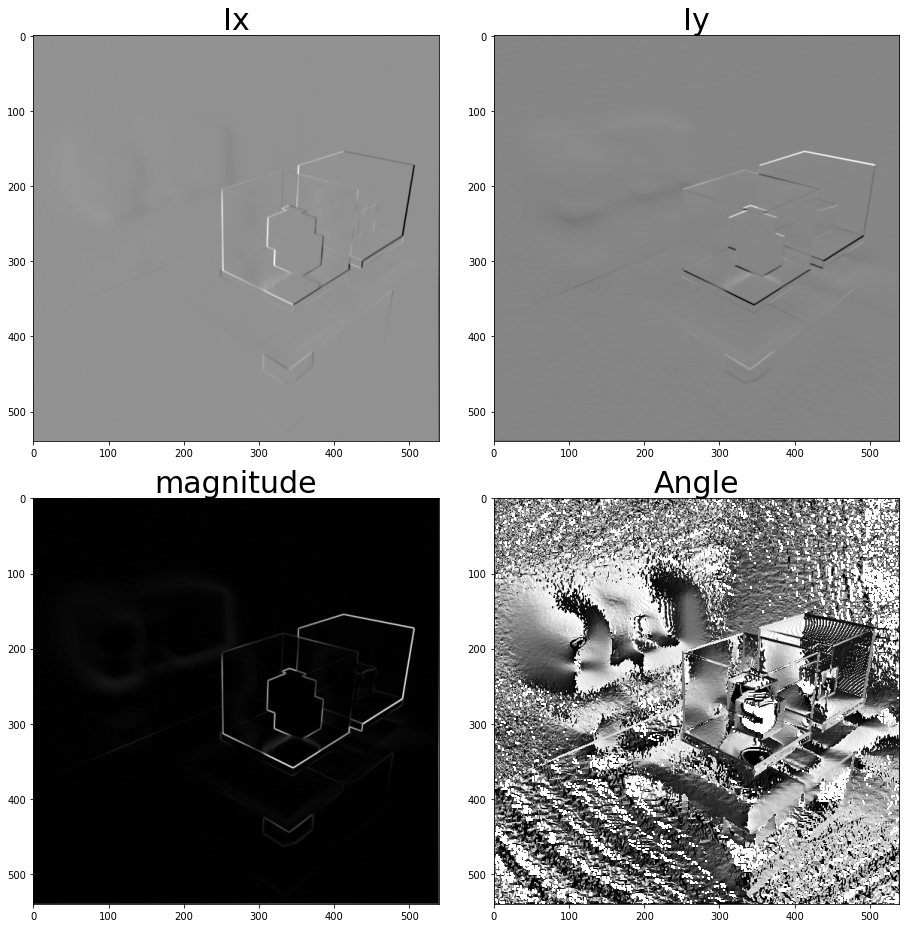

In [26]:
from scipy.linalg import fractional_matrix_power

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

images = {}
gray = rgb2gray(image)    

I_x_SobelFilter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

I_x_image = scipy.signal.convolve2d(
    image, I_x_SobelFilter, mode='same')

images["Ix"] = I_x_image 


I_y_SobelFilter = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

   
I_y_image = scipy.signal.convolve2d(
    image, I_y_SobelFilter, mode='same')

images["Iy"] = I_y_image




G = np.square(I_x_image)+ np.square(I_y_image)
G = np.sqrt(G)

images["magnitude"] = G


angle = np.arctan(np.divide(I_y_image,I_x_image))

images["Angle"] = angle



fig, axes = plt.subplots(2, 2, figsize=(13,13))

i = 0

for key, value in images.items():
    ax = axes[i//2, i%2]
    ax.imshow(value, cmap = "gray")
    ax.set_title(key, fontsize=30)
    i = i+1
plt.savefig("P1_2.eps", format = 'eps')

plt.tight_layout()
plt.show()


   
# print("angle:",angle)


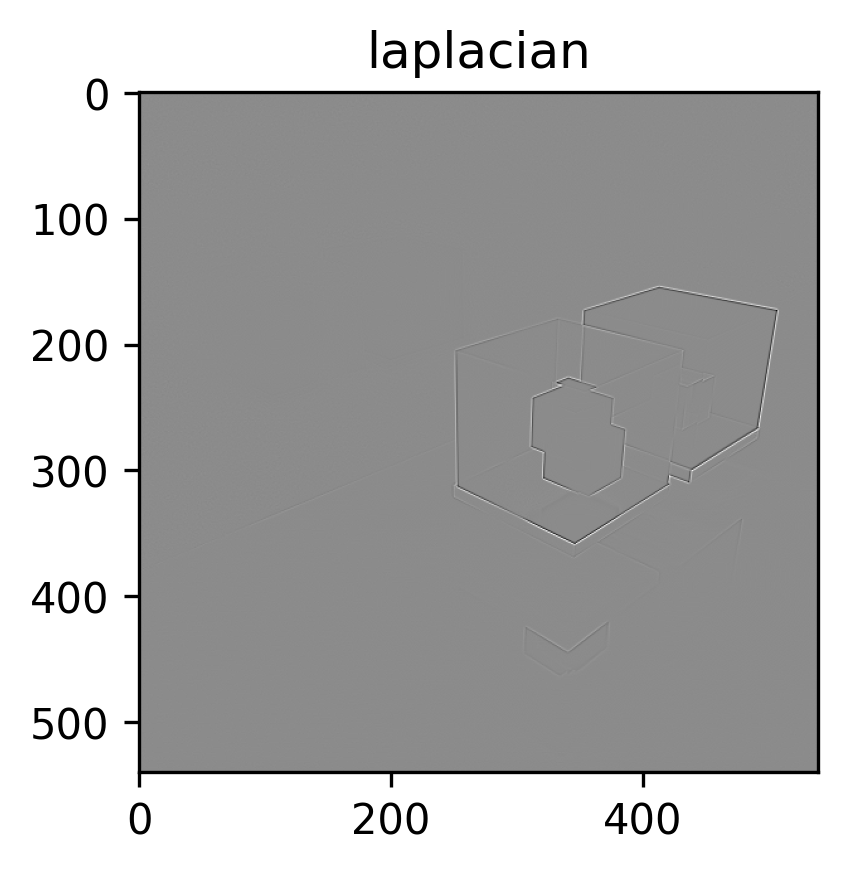

In [27]:
image = load_image("light_cubes_sm.png")[:, :, 0]

laplacian_filter = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

laplacian = scipy.signal.convolve2d(
    image, laplacian_filter, mode='same')


fig = plt.figure(figsize=(3, 3), dpi=300)
plt.title("laplacian")

plt.imshow(laplacian, cmap='gray')
plt.savefig("laplacian.eps", format = 'eps')









### P1.1.3 Gaussian Filtering

Compute a discrete Gaussian Filter by completing the function `get_gaussian_filter` defined below. Compute filters of three different $\sigma$ values and apply them to your image (you should be able to see the difference in amount of blur between them). Plot the filters alongside the images they are used to generate. Be sure that the filter width is large enough that it does not meaningfully impact the output (a standard convention is to ensure that the filter width is at least $3\sigma$). What would happen if the filter width were too small compared to $\sigma$? You may answer in words, though a figure would also be acceptable.

In class, we defined a `3x3` Gaussian filter as follows:
$$g = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$
What is the $\sigma$ of this filter?



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

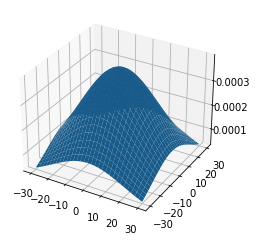

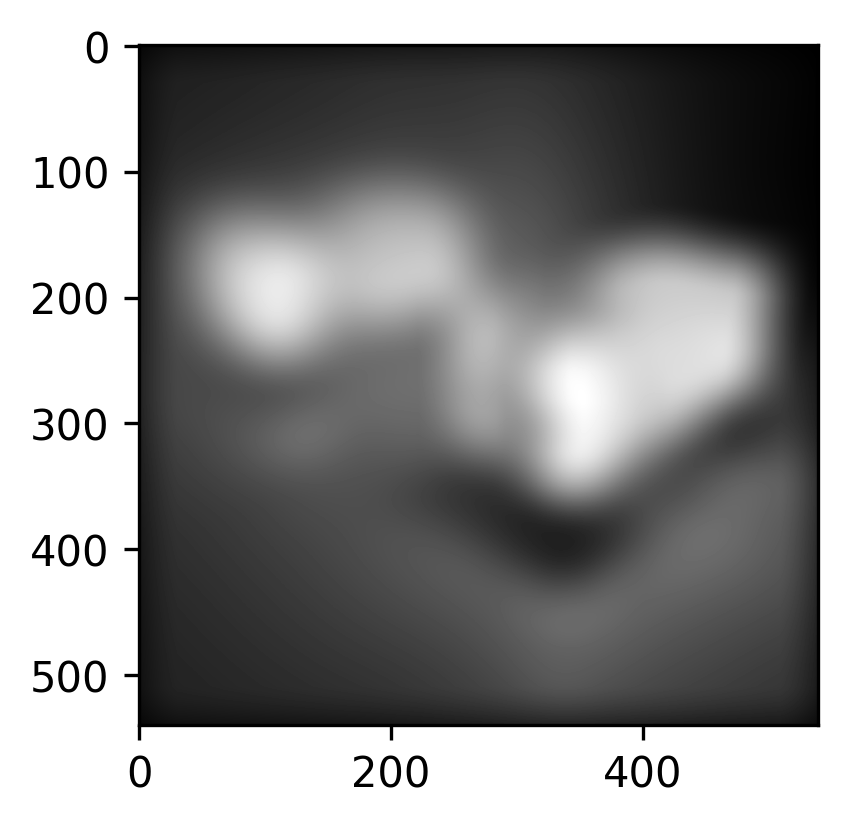

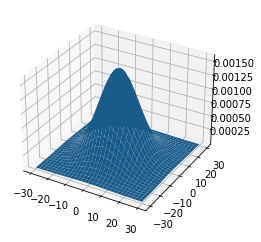

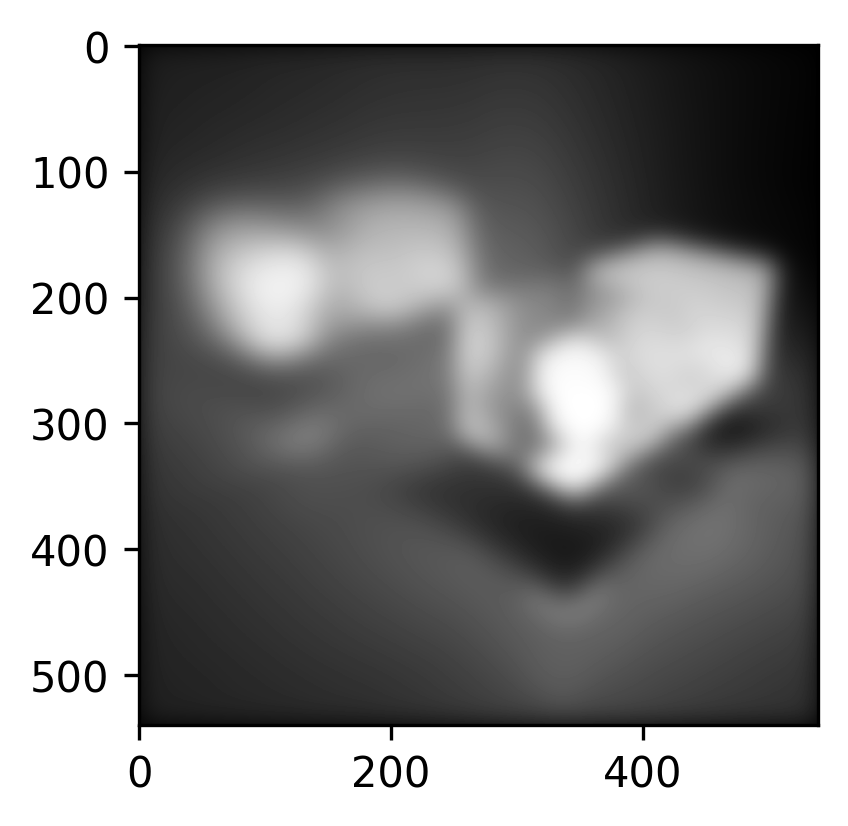

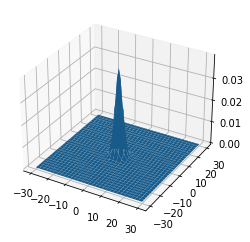

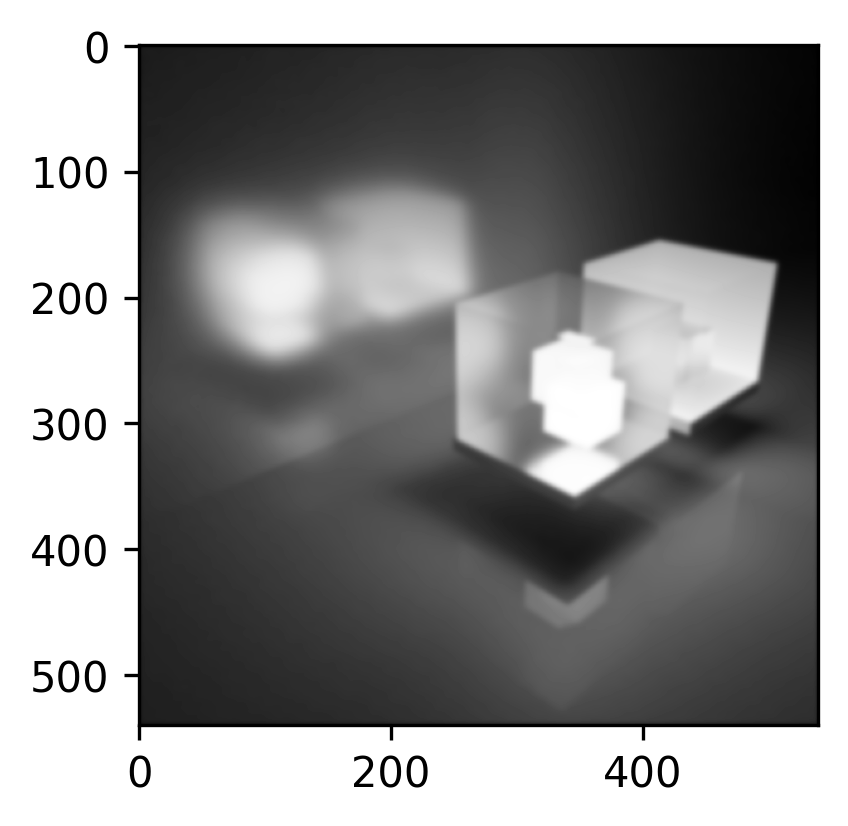

In [145]:
from mpl_toolkits.mplot3d import Axes3D


def get_gaussian_filter(filter_width, sigma):
    x = np.arange(-math.floor(filter_width/2), math.floor(filter_width/2)+1)
    y = np.arange(-math.floor(filter_width/2), math.floor(filter_width/2)+1)
    x2d, y2d = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    kernel = (np.exp(-(x2d**2 + y2d**2)/(2*(sigma**2)))/(2*np.pi*(sigma**2)))
    ax.plot_surface(x2d, y2d, kernel)
    if(sigma == 20):
        plt.savefig("gaussian_sigma_20.eps", format = 'eps')
        
    if(sigma == 10):
        plt.savefig("gaussian_sigma_10.eps", format = 'eps')
        
    if(sigma == 2):
        plt.savefig("gaussian_sigma_2.eps", format = 'eps')

    return kernel

result_img = scipy.signal.convolve2d(
    image, get_gaussian_filter(60,20), mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(result_img, cmap='gray')
plt.savefig("Image_sigma_20.eps", format = 'eps')



result_img = scipy.signal.convolve2d(
    image, get_gaussian_filter(60,10), mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(result_img, cmap='gray')
plt.savefig("Image_sigma_10.eps", format = 'eps')



result_img = scipy.signal.convolve2d(
    image, get_gaussian_filter(60,2), mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(result_img, cmap='gray')
plt.savefig("Image_sigma_2.eps", format = 'eps')





### P1.1.4 Derivative of Convolution

In class, we discussed the derivative of convolution theorem:

$$ \frac{\partial }{\partial x} (f * h) = \frac{\partial f}{\partial x} * h $$

Show empirically that this theorem holds on your image.

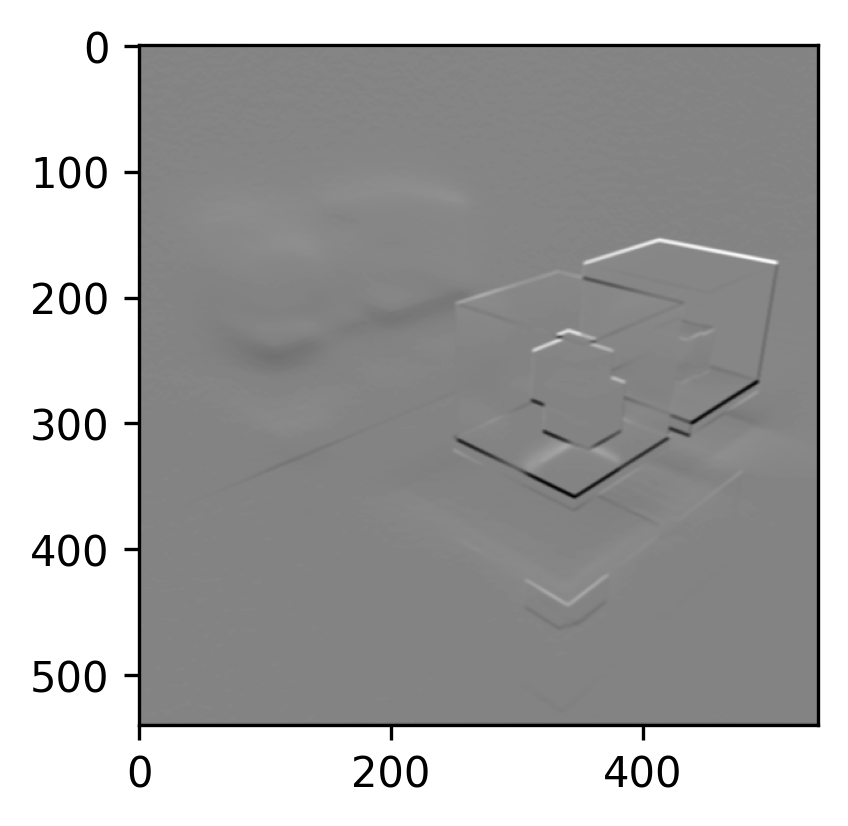

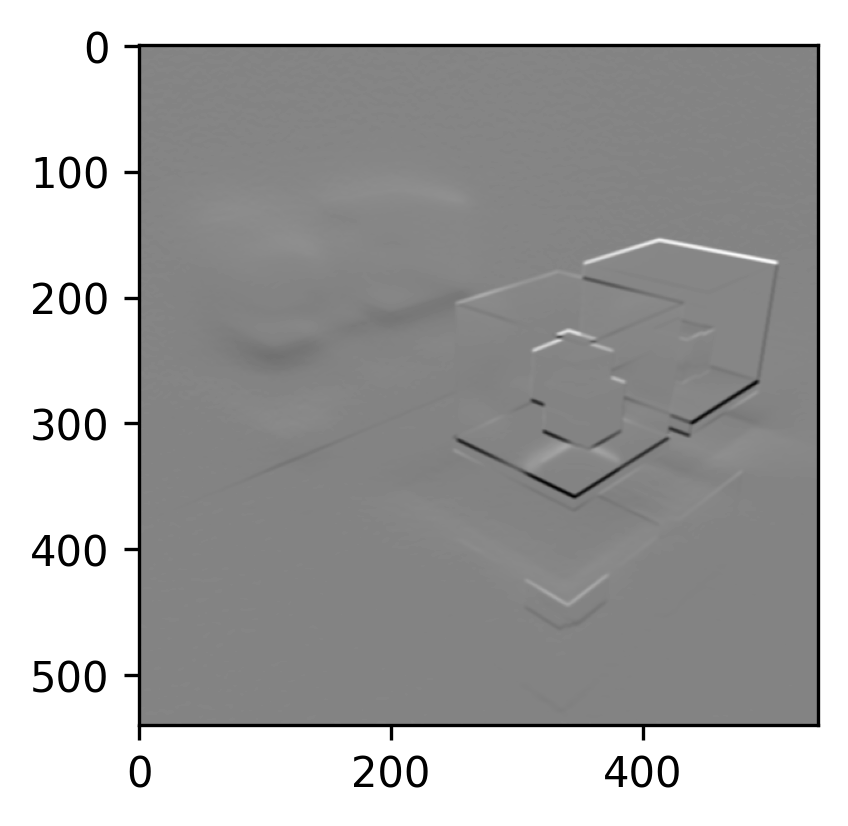

In [147]:
from scipy.ndimage import filters
image = load_image("light_cubes_sm.png")[:, :, 0]

ex_filter = 1/9 * np.array( [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

filtered_img = scipy.signal.convolve2d(
    image, ex_filter, mode='same')

d_x = filters.sobel(filtered_img, 0)  
fig = plt.figure(figsize=(3, 3), dpi=300)

plt.imshow(d_x, cmap='gray')
plt.savefig('result1.eps', format='eps',bbox_inches = 'tight')



d_x = filters.sobel(image, 0)  
filtered_img = scipy.signal.convolve2d(
    d_x, ex_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)

plt.imshow(filtered_img, cmap='gray')
plt.savefig('result2.eps', format='eps',bbox_inches = 'tight')

## P1.2 Image Upsampling

In class, we discussed *Image Upsampling*, the process of making larger images from smaller ones by interpolating between the discrete pixel values. Upsampling (and the interpolation process) will become quite relevant in a few weeks when we discuss image warping. As such, you should make sure that these functions are well-documented and you can easily reuse them: **you will need them again**.

### P1.2.1 Upsampling Kernels

In this part of the problem, you will be asked to upsample an image using some of the interpolation strategies we discussed in class. I have provided an image and its downsampled version.

Your task is to complete the `interp_STRATEGY` functions I have provided below. For each function, you are asked to provide the original image and the `new_x` and `new_y` values at which you would like the new value. I have provided you with the `upsample_image` function that will use the interpolation function you will create. Make sure you understand what is going on in that function. In particular, I have used the `np.ndenumerate` function to loop through the numpy arrays and the `image[y, x]` convention (since the image is stored as `[rows, columns]`).

I recommend that you begin by implementing an interpolation function that works on a 1-dimensional signal before attempting to upsample a 2-dimensional image. Feel free to include plots of the 1D interpolation if you feel it is helpful to your writeup.

Implement the four different interpolation strategies listed below: *nearest neighbor*, *bilinear*, and *bicubic* (See Ch 3.5 in Szeliski for a discussion of these strategies). Note that *bicubic* interpolation requires selecting a *boundary condition* for points outside the image; feel free to choose a "zero" boundary condition: i.e. return 0 whenever a point outside the image is requested. After interpolation, confirm that downsampling your upsampled image recovers your uninterpolated image for each upsampling function.

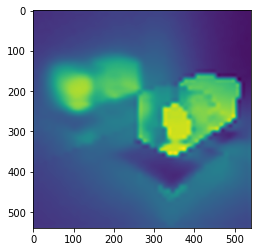

In [137]:
import math 

def upsample_image(image, target_shape, interp_fn):
    # Initialize the upsampled image
    image_up = np.zeros(target_shape)
    
    # Define the new coordinates (using the [y, x] convention
    # since image matrices are defined [row, column])
    new_xs = np.linspace(0, image.shape[1]-1, 
                         target_shape[1], endpoint=True)
    new_ys = np.linspace(0, image.shape[0]-1, 
                         target_shape[0], endpoint=True)
    
    # Loop through coordinates and set the image values

    for ix, new_x in np.ndenumerate(new_xs):
        for iy, new_y in np.ndenumerate(new_ys):
            image_up[iy, ix] = interp_fn(image, new_x, new_y)
            
    return image_up

def wAvrage(val1, val2, ratio):
        real_ratio = ratio - math.floor(ratio)
        out = val1*(1-real_ratio) + val2* real_ratio
        return out
    
def u(s,a):
    if (abs(s) >=0) & (abs(s) <=1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0

def interp_nn(image, new_x, new_y):
    
    New_pix = image[math.floor(new_y)][math.floor(new_x)]


    return New_pix
    
def interp_bilinear(image, new_x, new_y):
    
    image = np.pad(image,(0,1), mode='edge')
    
    X = image[math.floor(new_y)][math.floor(new_x)]
    Y = image[math.floor(new_y)][math.floor(new_x)+1]
    T = image[math.floor(new_y)+1][math.floor(new_x)]
    K = image[math.floor(new_y)+1][math.floor(new_x)+1]
    

    New_pix_XY = wAvrage(X, Y, new_x)
    New_pix_TK = wAvrage(T, K, new_x)
    New_pix_XYTK = wAvrage(New_pix_XY, New_pix_TK, new_y)
     
    return New_pix_XYTK
    
def interp_bicubic(img, new_x, new_y):
    
    img = np.pad(img,((2,2),(2,2)), mode='constant')
    
    a = -0.5
    x, y = new_x + 2 , new_y + 2

    x1 = 1 + x - math.floor(x)
    x2 = x - math.floor(x)
    x3 = math.floor(x) + 1 - x
    x4 = math.floor(x) + 2 - x

    y1 = 1 + y - math.floor(y)
    y2 = y - math.floor(y)
    y3 = math.floor(y) + 1 - y
    y4 = math.floor(y) + 2 - y

    mat_l = np.matrix([[u(x1,a),u(x2,a),u(x3,a),u(x4,a)]])
    mat_m = np.matrix([[img[int(y-y1),int(x-x1)],img[int(y-y2),int(x-x1)],img[int(y+y3),int(x-x1)],img[int(y+y4),int(x-x1)]],
                       [img[int(y-y1),int(x-x2)],img[int(y-y2),int(x-x2)],img[int(y+y3),int(x-x2)],img[int(y+y4),int(x-x2)]],
                       [img[int(y-y1),int(x+x3)],img[int(y-y2),int(x+x3)],img[int(y+y3),int(x+x3)],img[int(y+y4),int(x+x3)]],
                       [img[int(y-y1),int(x+x4)],img[int(y-y2),int(x+x4)],img[int(y+y3),int(x+x4)],img[int(y+y4),int(x+x4)]]])
    mat_r = np.matrix([[u(y1,a)],[u(y2,a)],[u(y3,a)],[u(y4,a)]])
    dst = np.dot(np.dot(mat_l, mat_m),mat_r)

    return dst
    
# An example use of the upsample_image function
image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]
# image_sm = np.array([[100,50],[70,20]])
image_up = upsample_image(image_sm, image.shape, interp_bicubic)
fig = plt.figure()
plt.imshow(image_up)
plt.savefig("interp_bilinear.eps", format = 'eps')


### P1.2.2 Upsampling with Fourier Transforms

One can also upsample images using a Fourier Transform using a technique known as *zero padding* ([here is a link](https://dsp.stackexchange.com/a/745) to a surprisingly succinct discussion of the rationale behind this approach from Stack Exchange). The idea behind zero padding is to (1) Fourier Transform your signal, (2) add zero-valued elements to the signal in frequency space (thereby making the vector or matrix larger without adding any new frequency components) and (3) transforming back.

You will be using the numpy `np.fft.fft2` to compute a Fourier Transform of an image and upsample it; do not implement the Fast Fourier Transform yourself. One thing you will notice in your implementation is that using the FFT implementation provided by numpy results in most of the "mass" in frequency space near the corner of the images (see my code below for an example). Using the ideas discussed in class (the Nyquist Limit and the Wagon Wheel Effect) **explain in words why the four corners of the frequency-space image are where most of the intensity is located**. *Hint*: for a discrete Fourier Transform, there are no explicitly "negative frequencies". How are frequencies above the Nyquist Limit related to  the "negative frequencies" we would expect to see when taking a continuous Fourier Transform?

**Implement image interpolation using zero-padding**. Once again, if your interpolation is successful, downsizing your interpolated image should result in the original, smaller image. Consult [the numpy FFT documentation](https://numpy.org/doc/stable/reference/routines.fft.html) for details on the implementation. You will find that the `np.fft.fftshift` function will be useful here. Once again, you might find it easier to begin by using this approach on a 1D signal and then extending that code to support a 2D image. How do you know that your upsampling procedure worked? What happens if you downsample the image again?

Compare the frequency-space representations of the Fourier Transform upsampled image to the upsampled images you generated with the other upsampling kernels. What do you observe? Is this behavior expected? Compare this to the frequency-space representation of the original image.

fft_image_sm (54, 54)
fft_image_sm_new :  (54, 54)
fft_upsample : (540, 540)


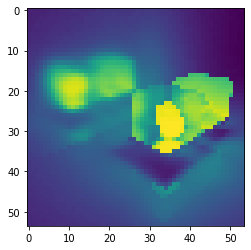

In [119]:
image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]


# ax = plt.subplot(1, 2, 1)
# ax.imshow(image_sm)
# ax.set_xticks([])
# ax.set_yticks([])

# ax = plt.subplot(1, 2, 2)
# ax.imshow(np.abs(np.fft.fft2(image_sm)))
# ax.set_xticks([])
# ax.set_yticks([])

fig = plt.figure()
plt.imshow(image_sm)
plt.savefig("image_sm.eps", format = 'eps')


fft_image_sm = np.fft.fft2(image_sm)
fft_upsample = np.zeros((image.shape))
fft_image_sm_new = np.fft.fftshift(fft_image_sm)
print("fft_image_sm", fft_image_sm.shape)
print("fft_image_sm_new : ", fft_image_sm_new.shape)
X = math.floor((fft_upsample.shape[0] -fft_image_sm_new.shape[0])/2)
fft_upsample = np.pad(fft_image_sm_new, pad_width= X , mode='constant')
            

fft_upsample = np.fft.ifftshift(fft_upsample)
fft_upsample = np.fft.ifft2(fft_upsample)


print("fft_upsample :",fft_upsample.shape)
plt.imshow(np.abs(fft_upsample))
plt.savefig("fft_upsample.eps", format = 'eps')

fft_upsample_sm = fft_upsample[::10, ::10]
plt.imshow(np.abs(fft_upsample_sm))
plt.savefig("fft_upsample_sm.eps", format = 'eps')


# mat2 = ifft2(k);

# None

# P1.3 Hybrid Images (Contest)

In class, we discussed *hybrid images* in which the low-frequency components of one image are added to the high-frequency components of another and added together to make an image that looks like their different components up close and from far away. See the [Hybrid Images paper](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) for more details about the original research. 

Here, you are asked to implement a simplified version of the Hybrid Images work. We will vote as a class on the different submissions and pick out our favorites (though the vote will have no consequence on your grade).

Steps for completion:

1. Choose two images you intend to combine to form your *hybrid image*.
2. Implement a low-pass filter (using a Gaussian Blur: $g_{\sigma_1}$) and a high-pass filter (1 minus a Gaussian Blurred image: $1 - g_{\sigma_2}$). Apply the low-pass filter to one image and the high-pass filter to the other and average the two together. You may need to experiment with parameters $\sigma_1$ and $\sigma_2$.
3. **Generate a Gaussian image pyramid** from your newly constructed hybrid image. Combine all images into a single image as follows (without annotations): <img src="image_pyramid.png" alt="Image Pyramid" style="width: 400px;"/>

You do not need to implement the Laplacian image pyramid now, but you will likely need it again later on in the course, so it might be worth it to implement it now so that you have such a function when you need it.

(513, 513)
(513, 513)


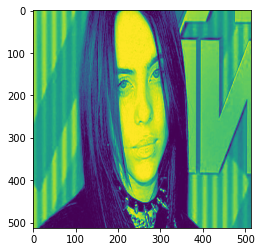

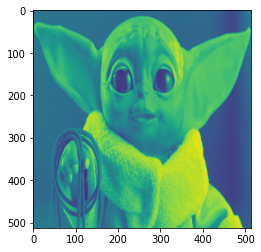

<Figure size 432x288 with 0 Axes>

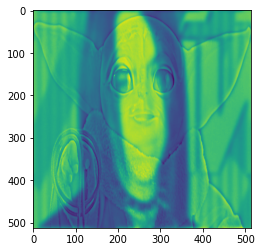

In [135]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import numpy 

def get_gaussian_filter(filter_width, sigma):
    x = np.arange(-math.floor(filter_width/2), math.floor(filter_width/2)+1)
    y = np.arange(-math.floor(filter_width/2), math.floor(filter_width/2)+1)
    x2d, y2d = np.meshgrid(x, y)
    fig = plt.figure()
    kernel = (np.exp(-(x2d**2 + y2d**2)/(2*(sigma**2))))
    return kernel

def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return ifft2(ifftshift(filteredDFT))
 

image1 = load_image("Billie-Eilish-Vegan-featured1.jpg")[:, :,0]

fig = plt.figure()
plt.imshow(image1)

print(image1.shape)
image2 = load_image("You.jpg")[:, :,0]
print(image2.shape)


fig = plt.figure()
plt.imshow(image2)

low_pass = get_gaussian_filter(image1.shape[0],17)
# print(low_pass.shape)
hight_pass = 1 - low_pass

low_pass = filterDFT(image1,low_pass)
hight_pass = filterDFT(image2,hight_pass)

hybrid_image = low_pass+hight_pass

fig = plt.figure()
plt.imshow(numpy.real(hybrid_image))
plt.savefig('youbili.esp', format='eps',bbox_inches = 'tight')

/Users/negar/Downloads/L01_welcome_filtering/CS682venv/lib/python3.7/site-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part


<Figure size 432x288 with 0 Axes>

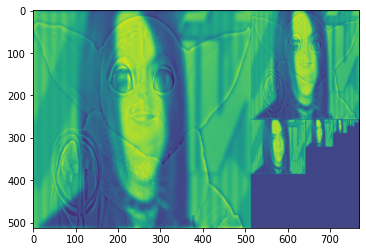

In [136]:
import numpy
import scipy.signal
from scipy.signal import convolve2d


def gaussian_reduce(image,levels):
    
    layers = [image]
    a = 0.4
    b = 1./4
    c = 1./4 - a/2
    filt =  np.array([[c, b, a, b, c]])
    
    for i in np.arange(levels):
        p_0 = np.pad( layers[-1], (2,), mode='constant' )

        # convolve in the x and y directions to construct p_1
        p_1 = convolve2d( p_0, filt, 'valid' )
        p_1 = convolve2d( p_1, filt.T, 'valid' )
        layers.append(p_1[::2,::2])
    return layers

    
def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(np.float)/255)[:, :, :3]

image1 = hybrid_image
fig = plt.figure()
images = gaussian_reduce(image1,6)

fig = plt.figure()  # width, height in inches
all_images = np.zeros((513,770))
filled = np.ones((513,770))

x = y = 0 
for image in images:
    i , j = numpy.argwhere(filled==1)[0]
    all_images[i:i+len(image),j:j+len(image)] = image
    filled[i:i+len(image),j:j+len(image)]= 0

plt.imshow(all_images)
plt.savefig('pyramid.eps', format='eps',bbox_inches = 'tight')